In [5]:
import xarray as xr
import numpy as np
import os

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib import colors as colors

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [6]:
cmap_data = [(0, 'navy'),(0.1, 'blue'),(0.2,'DeepSkyBlue'),
             (0.3,'aquamarine'),(0.4,'PaleGreen'),(0.45,'moccasin'),
             (0.55,'moccasin'),(.6,'yellow'),(.7,'DarkOrange'),
             (.8,'red'),(1.0,'DarkRed')]
cmap = colors.LinearSegmentedColormap.from_list('correlationcolorscale', cmap_data)
plt.register_cmap('correlationcolorscale', cmap)

256

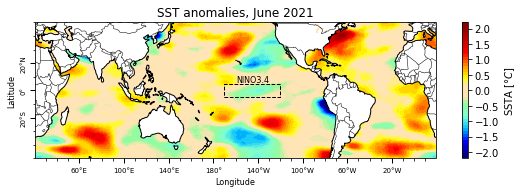

In [7]:
url = 'http://kage.ldeo.columbia.edu:81/SOURCES/.LOCAL/.sst.mon.mean.nc/.sst/dods'
ds = xr.open_dataset(url)
ds = ds.sel(time=slice('1979-01','2021-07'))
lon_start = 20
ds.coords['lon'] = (ds.coords['lon'] - lon_start) % 360 + lon_start ; ds = ds.sortby('lon')
ds_anom = ds.groupby('time.month').apply(lambda x: x - x.mean('time'))

crs = ccrs.PlateCarree()

fig = plt.figure(figsize=(9,2.5))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=200))
ax.set_extent([-20, 380, -50,  50], crs=crs)

cs = ds_anom.sst[-1].plot.contourf(ax=ax, transform=ccrs.PlateCarree(),vmin=-2, vmax=2, levels=41, cmap='correlationcolorscale', add_colorbar=False)  
ax.add_feature(cfeature.COASTLINE, linewidth=1.0)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)

# Use the figsize to determine the aspect ratio, not cartopy
ax.set_aspect('auto')

# Label x-axis and make tick labels
ax.xaxis.set_label_text('Longitude',fontsize=8)
ax.set_xticks(np.arange(60,380,40), crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(LongitudeFormatter())
ax.xaxis.set_minor_locator(MultipleLocator(10))

# Label y-axis and make tick labels
ax.yaxis.set_label_text('Latitude',fontsize=8)
plt.yticks(np.arange(-20,21,20), rotation=90, va='center')
ax.yaxis.set_major_formatter(LatitudeFormatter())
ax.yaxis.set_minor_locator(MultipleLocator(10))

# Make tick marks
ax.tick_params(which='major', width=1.00, length=5, labelsize=7)
ax.tick_params(which='minor', width=0.75, length=2.5)

# Add Nino3.4 box
rect = mpatches.Rectangle(xy=[190, -5], width=50, height=10, fill=False, transform=crs, linestyle='--')
ax.add_patch(rect)
ax.annotate('NINO3.4', xy=(215, 8), xycoords=crs._as_mpl_transform(ax), ha='center', va='center', fontsize=8)

cbar = plt.colorbar(cs, extendrect = True, label=r'SSTA [$\degree C$]')
plt.title('SST anomalies, June 2021');
plt.savefig('plot.eps')
os.system(f'/usr/bin/ps2eps -B -C < plot.eps > eps/CartopyRect-with-Label.eps');